In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 10,
          'figure.figsize': (10, 10),
         'axes.labelsize': 10,
         'axes.titlesize': 10,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
plt.rcParams.update(params) 

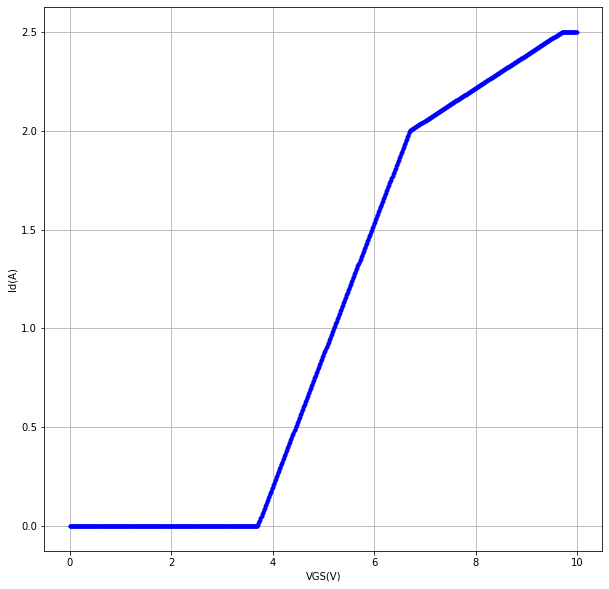

In [28]:
def idi(v):
    i =  0.             if (v < 3.7) else 0
    i = (2/3)*(v-3.7) if (v >= 3.7  and v <  6.7) else i
    i = 2+(0.5/3)*(v-6.7) if (v >= 6.7  and v <  9.7) else i
    i = (2.5) if (v >= 9.7  ) else i
    return i



vgsa = np.arange(0,10,0.01)
idsa = np.array([idi(v) for v in vgsa])

plt.plot(vgsa,idsa,'b.')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Id(A)')
plt.xlabel('VGS(V)')
plt.show()

In [6]:
Tp = 250e-6
Dp = 0.05*Tp

print(Tp, Dp)

0.00025 1.25e-05


In [124]:
# Tensión Fuente
VDD  = 13.6 
Po   = 4
zgs  = 2.59+ 1j* 6.83 
zds  = 8.08+ 1j* 3.46
# Tension entrada 
VGG = 3.9
Pin = 4/10**(1.7)

vg  = 6.8-VGG

vin = (Pin*3*2)**0.5
print(Pin, vin)

0.0798104925987552 0.6919992453699145


In [112]:
# defino el sampleo
n  = 100
# vector de tiempo 
th  = np.pi*np.linspace(-1, 1, num=n)

vgs = VGG + vg * np.cos(th)

ids = np.array([idi(v) for v in vgs])


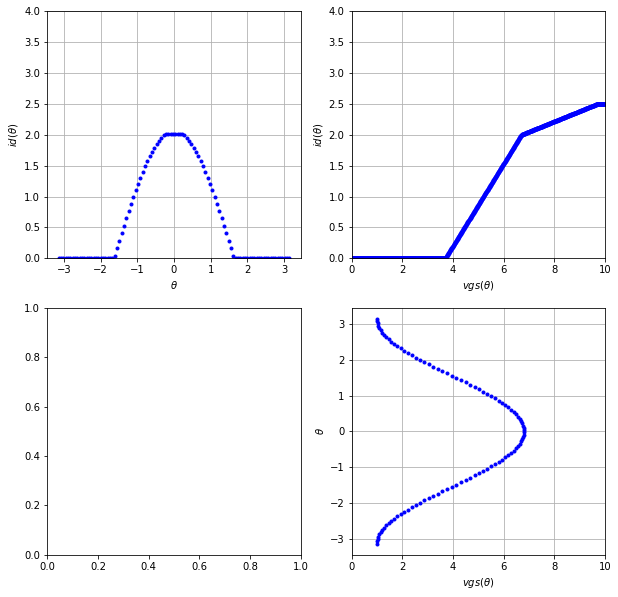

In [114]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)


# Plot various projections of the samples.
ax1.plot(th, ids, 'b.')
ax1.grid(True)
ax1.set(xlabel='$\\theta$', ylabel='$id(\\theta)$')
ax1.set(ylim=(0, 4))

ax2.plot(vgsa, idsa, 'b.')
ax2.grid(True)
ax2.set(xlabel='$vgs(\\theta)$', ylabel='$id(\\theta)$')
ax2.set(xlim=(0, 10))
ax2.set(ylim=(0, 4))

ax4.plot(vgs,th, 'b.')
ax4.set(xlabel='$vgs(\\theta)$', ylabel='$\\theta$')
ax4.set
ax4.grid(True)
ax4.set(xlim=(0, 10))

plt.show()


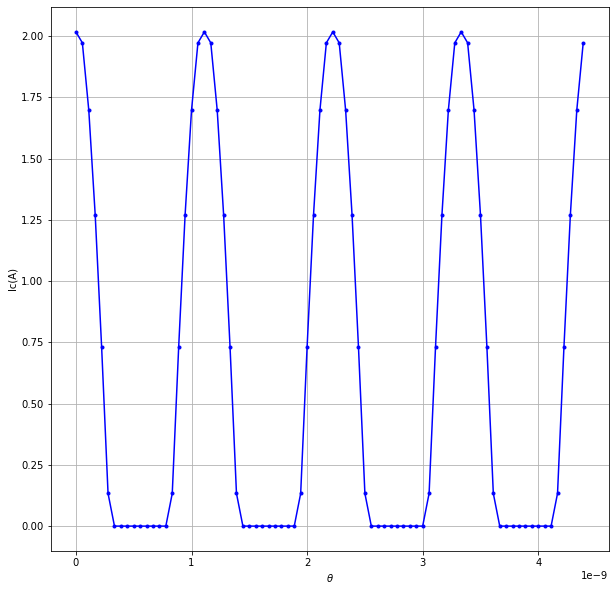

In [102]:
# Frecuencia de trabajo
fc = 900e6
fs = 20*fc
ds = 1/fs
# vector de tiempo 
numT  = 4
T     = numT/fc
time  = np.arange(0,T,ds)


vgs = VGG + vg * np.cos(2*np.pi*fc*time)

ids = np.array([idi(v) for v in vgs])

plt.plot(time, ids,'b.-')

#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()


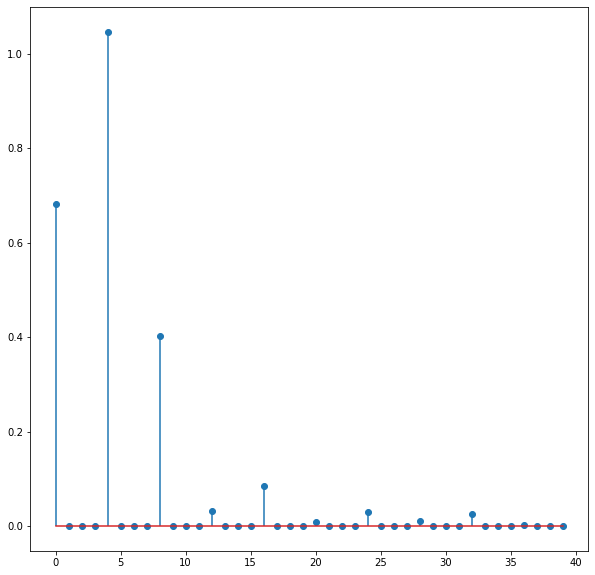

In [103]:
# Transformada Discreta de Fourier     
def DFT(x):
    N = len(x)
    X = list()
    for k in range(int(N/2)):
        a = 2*sum([s*np.cos(2*np.pi*n*k/N) for n,s in enumerate(x)])/N
        b = 2*sum([s*np.sin(2*np.pi*n*k/N) for n,s in enumerate(x)])/N
        if k == 0: X.append(a/2)
        else     : X.append(a+1j*b)
    return np.array(X) 

Idsf = DFT(ids)

plt.stem(abs(Idsf) )
plt.show()



1.0458500201956669
4.418961149562838


/home/aalmela/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


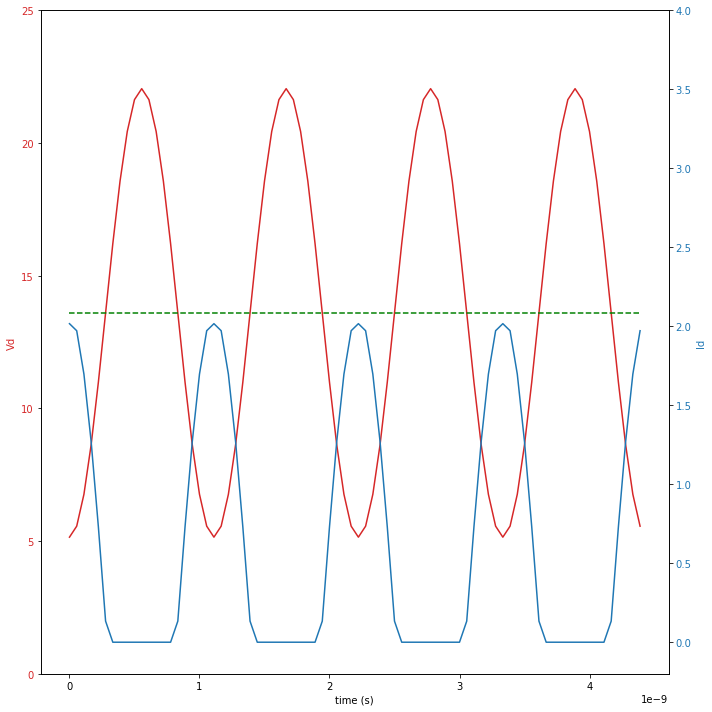

In [106]:
Id0 = Idsf[0]
Id1 = Idsf[numT].real * np.cos(2*np.pi*fc*time) + 1j * Idsf[numT].imag * np.sin(2*np.pi*fc*time)
Id2 = Idsf[2*numT]

print(max(abs(Id1)))
Po = max(abs(Id1))**2*zds.real/2

Rd = zds.real
print(Po)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Vd', color=color)
ax1.plot(time, VDD - Rd*Id1, color=color)
ax1.plot(time, [VDD for t in time] , 'g--')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set(ylim=(0, 25))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Id', color=color)  # we already handled the x-label with ax1
ax2.plot(time, ids, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set(ylim=(-0.2, 4))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


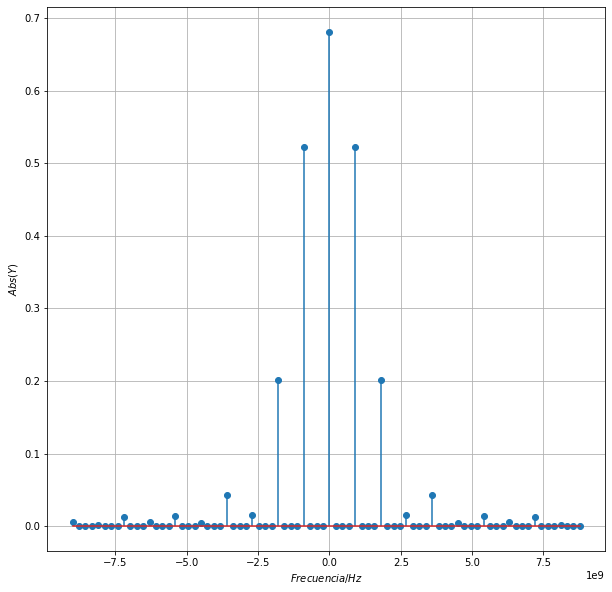

In [107]:
## Calculo del espectro empleando la funciones de scipy.fftpack  (fft, fftfreq)
#Se emplea mide el tiempo de computo de la función con fines de comparación. 


 
Y = fft(ids)/len(ids)  # Normalizada
#S = np.fft.fftshift(np.fft.fft(s))
#S_mag = np.abs(S)
#S_phase = np.angle(S)


frq = fftfreq(len(ids), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria
#plt.ylim(-0.1, 0.8)
plt.xlabel('$Frecuencia/Hz$'); plt.ylabel('$Abs(Y)$')
plt.grid(); plt.show()

In [45]:
fo   = 30e6
wo   = 2*np.pi*fo
 
rzo  = 50 

rin  = 20

Ls   = 560e-9  
Qo   = 45

Qm1  = (wo*Ls)/rin

rinp = rin*(1+Qm1**2)
Lsp  = Ls*(1+1/Qm1**2)

Cs   = 1/(Lsp*wo**2)

Qm2  = (rinp/rzo-1)**0.5

C1   = 1/(wo*Qm2*rzo)

C1p  = C1/(1+1/Qm2**2)

C2   = Cs- C1p

print(".param L ={:1.3e}".format(Ls))

print(".param C1 ={:1.3e}".format(C1))

print(".param C2 ={:1.3e}".format(C2))


      

.param L =5.600e-07
.param C1 =3.268e-11
.param C2 =1.867e-11
